# Вероятностные модели

Вероятностные модели широко используются для управления кредитным риском розничных заемщиков. Среди них **аппликативные модели** ориентированы на предварительную оценку кредитного риска заемщика на этапе его обращения в банк за кредитом и принятия решения по выдаче ссуды. На основе имеющегося у банка практического опыта учет характеристик заемщиков и финансовых инструментов в рамках классов однородных кредитных требований к розничным заемщикам может осуществляться посредством последовательного применения аппликативных моделей, используемых на этапе обращения заемщика в банк, и **поведенческих моделей**, позволяющих учитывать поведение заемщика в процессе обслуживания ссуды.

При этом для оценки вероятности дефолта заемщика банк использует всю имеющуюся информацию о заемщике. В связи с этим при появлении у заемщиков значимых поведенческих факторов риска или иной существенной информации о заемщике банку рекомендуется использовать поведенческую модель оценки заемщика в процессе обслуживания ссуды. Вероятность дефолта, полученная с помощью как поведенческих, так и аппликативных моделей, калибруется на долгосрочную среднегодовую величину фактической частоты дефолтов.

*(с) Консультант плюс*

## Аппликативные модели
 играют важную роль на начальном этапе взаимодействия банка с заемщиком. Эти модели помогают принять решение о выдаче кредита, используя различные факторы и скоринговые методы. В некоторых случаях аппликативные модели могут быть реализованы без вероятностных оценок, опираясь исключительно на скоринг, который представляет собой линейную комбинацию преобразованных факторов модели. Главная задача таких моделей - ранжирование потенциальных клиентов, то есть определение их места в очереди с учетом риска.

Банк устанавливает **пороговый уровень (threshold)**, и клиенты, которые получают оценку ниже этого уровня, получают кредит, в то время как те, кто превышает порог, получают отказ.  


**Логистическая регрессия**

+ С выполнением предварительной обработки факторов (то есть трансформации каждого отдельного признака) и при правильной настройке регуляризации, она может показать результаты, близкие к более сложным методам.

+ Модель менее подвержена переобучению.

+ Обладает ясной интерпретацией результатов.

+ Легко документировать и объяснять её работу регуляторам.

## Поведенческие модели
используются для прогнозирования поведения заемщика **после выдачи** кредита. Эти модели могут быть калиброваны с использованием двух основных подходов: TTC (Through the Cycle) и PIT (Point in Time).

TTC рассчитывается как средний годовой уровень дефолтов за 5-7 лет, что позволяет получить более стабильную оценку для расчета резервов и капитала.

 PIT, с другой стороны, отражает текущую ситуацию и рассчитывается как среднегодовой уровень дефолтов за последние полгода или год.

Выбор подходящей калибровки зависит от цели расчета. Для оценки текущей стоимости портфеля и других актуальных показателей используется PIT, в то время как TTC применяется для более долгосрочного планирования, такого как расчет резервов и капитала. Поведенческие модели позволяют банку прогнозировать поведение заемщиков и принимать информированные решения, основываясь на конкретных горизонтах и уровнях дефолтов.


## Коэффициент Джини, AUC и другие метрики качества моделей

После разработки модели важно оценить ее качество, особенно в контексте способности к ранжированию клиентов, так как этот аспект наиболее важен для принятия решений о выдачи клиенту займов.

Среди основных метрик выделяются:

*  **ROC AUC**: это вероятность того, что дефолтный заемщик имеет уровень вероятностного дефолта (PD), превышающий таковой у недефолтного заемщика;

*  **Коэффициент Джини**: позволяет оценить эффективность модели в ранжировании заемщиков вне зависимости от конкретных порогов отсечения.

Следует отметить, что ROC AUC и коэффициент Джини являются общепринятыми метриками качества в банковской сфере и используются для сравнения различных моделей.

Коэффициент Джини демонстрирует корреляционные свойства:

*   0: отсутствие связи между целевой переменной и PD;
*   1: все дефолтеры имеют PD выше, чем добросовестные заемщики;
*   -1: ранжирование заемщиков происходит в обратном порядке.

Таким образом, значения Джини ниже 30% указывают на низкое качество модели, в то время как значения выше 60% свидетельствуют о высоком качестве.

In [ ]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    sns.set(font_scale=1.2)

    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))

    # Create figure and subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap='afmhot', ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')
    ax1.grid(False)

    # Plot ROC curve for test data and display AUC score
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')

    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('white')
    plt.tight_layout()
    plt.show()

Прежде, чем начать поиск оптимальных гиперпараметров необходимо определить функции для оценки модели

**Scorer functions**

In [ ]:
from sklearn.metrics import roc_curve

def gini(model, x_train, y_train):
    y_prob = model.predict_proba(x_train)[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_prob)
    gini = 2 * (tpr - fpr).mean() - 1
    return gini

In [ ]:
def f1_metric(model, X_train, y_train):
    return f1_score(y_train, model.predict(X_train), average='binary')

In [ ]:
def metrics_calculator(clf, X_test, y_test, model_name):
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='binary'),
                                recall_score(y_test, y_pred, average='binary'),
                                f1_score(y_test, y_pred, average='binary'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1])],
                          index=['Accuracy','Precision','Recall', 'F1-score','AUC'], #'Accuracy','Precision','Recall',
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

## Оптимизация гиперпараметров



Оптимизируем все гиперпараметры для классификатора, выполняя поиск по указанной сетке гиперпараметров. Используем GridSearchCV и перекрестную проверку (StratifiedKFold) для оценки различных комбинаций гиперпараметров и выбираем
комбинацию с наивысшей оценкой gini.

Функция возвращает лучший классификатор с оптимальными гиперпараметрами.

In [ ]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train):
    # Создаем объект кросс-валидации, который обеспечивает сохранение пропорций классов в каждой части
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Создаем объект для брутфорсного поиска по заданной сетке параметров, используя кросс-валидацию, и оценивает различные комбинации на основе метрики F1
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=f1_metric, n_jobs=1)

    # Обучаем GridSearchCV на тренировочных данных
    clf_grid.fit(X_train, y_train)

    print("Best hyperparameters:\n", clf_grid.best_params_)

    return clf_grid.best_estimator_

## Ранжирование признаков по их вкладу в предсказания (feature importance)

In [ ]:
def drop_column_importance(model, X_train, y_train, random_state=0):
    '''
    Функция определяет важность признаков на основе уменьшения производительности модели при исключении каждого признака по отдельности
    '''
    importances = []
    # Клонирование позволяет использовать один и тот же объект, обучая его многократно, избегая переобучения.
    model_clone = clone(model)
    model_clone.random_state = random_state
    model_clone.fit(X_train, y_train)

    # Используем кросс-валидацию для оценки исходной модели перед началом измерения важности
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    # Score the benchmark model using cross-validation
    benchmark_score = cross_val_score(model_clone, X_train, y_train, cv=cv, scoring=f1_metric).mean()

    for col in X_train.columns:
        '''
            Для каждого признака:
            Клонируется модель.
            Обучается с исключенным признаком.
            Вычисляется оценка gini для модели без этого признака.
            Разница между исходной оценкой и новой оценкой (после исключения признака) добавляется в список importances.
        '''
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_column_score = cross_val_score(model_clone, X_train.drop(col,axis=1), y_train, cv=cv, scoring=gini).mean()
        importances.append(benchmark_score - drop_column_score)

    # На выходе получается DataFrame с признаками и их важностью, отсортированный по убыванию значения важности.
    importances_df = pd.DataFrame({'feature': X_train.columns, 'feature importance': importances}) \
                     .sort_values('feature importance', ascending = False).reset_index(drop = True)

    return importances_df

**График**

In [ ]:
def drop_column_importance_plot(model, X_train, y_train):
    df_drop_column = drop_column_importance(model, X_train, y_train, random_state=0)
    df_drop_column.columns = ['feature', 'feature importance']

    plt.figure(figsize=(12,10))
    sns.barplot(data=df_drop_column, x='feature importance', y='feature', orient='h', color=(0.8, 0.9, 0.8, 0.8))
    plt.title('feature importance', fontsize=20)
    plt.show()

# Моделирование

## Логистическая регрессия

 предсказывает вероятности принадлежности объекта к каждому классу. Сумма ответов логистической регрессии на одном объекте для всех классов равна единице



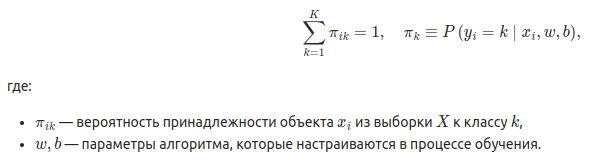

Из этого свойства модели в случае бинарной классификации требуется вычислить лишь вероятность принадлежности объекта к одному из классов (вторая вычисляется из условия нормировки вероятностей). Эта вероятность вычисляется, используя логистическую функцию:

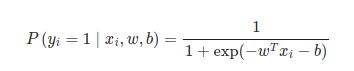

Параметры *w* и *b* находятся как решения оптимизационной задачи, например, с *L2*-регуляризацией:

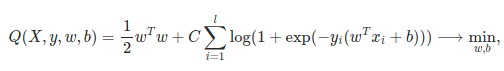

или *L1*-регуляризацией:

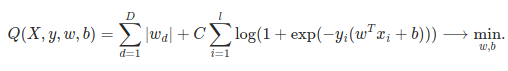

*C* — гиперпараметр модели, который регулирует то, насколько сильно мы позволяем модели подстраиваться под данные.

**Определение весов классов**

Создадим список весов для классов. Это подойдет для нашего случая, когда классы несбалансированы (один класс сильно преобладает)

np.linspace(0.001, 0.5, 20) генерирует 20 значений от 0.001 до 0.5 и создает веса для класса 0 (например, положительный класс) и 1 (отрицательный класс).

In [ ]:
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,0.5,20)]

### Настройка гиперпараметров и обучение

Настроем сетку гиперпараметров для модели логистической регрессии, где перечислены варианты решений(solver), типов штрафов (penalty), коэффициента регуляризации (C), а также весов классов.

In [ ]:
param_grid = [{'solver':['lbfgs', 'newton-cg', 'sag', 'saga'],
               'penalty':['none'],
               'class_weight':class_weights},

              {'solver':['lbfgs', 'newton-cg', 'sag'],
               'penalty':['l2'],
               'C': np.logspace(-5, 5, 10), #  генерирует 10 значений для C с масштабом между 10^-5 и 10^5.
               'class_weight':class_weights},

              {'solver':['liblinear', 'saga'],
               'penalty': ['l1', 'l2'],
               'C': np.logspace(-5, 5, 10),
               'class_weight':class_weights},

              {'solver':['saga'],
               'penalty':['elasticnet'],
               'C': np.logspace(-5, 5, 10),
               'l1_ratio': np.arange(0,1.1,0.1), #  генерирует значения для l1_ratio, которые используются в elastic net регуляризации.
               'class_weight':class_weights}]

**Коэффициент регуляризации**

Регуляризация — техника, используемая для предотвращения переобучения модели при обучении с использованием регуляризирующих коэффициентов, таких как L1 (Lasso) или L2 (Ridge). В логиcтической регрессии это помогает:

*   Уменьшить сложность модели, исключая незначимые признаки.
*   Предотвратить переобучение на обучающей выборке, что позволяет модели лучше обобщать на новых данных.

Необходимо исследовать различные значения этого коэффициента и найти оптимальное, которое обеспечит наилучшее качество модели

### Оценка производительности модели логистической регрессии

In [ ]:
#Базовая модель с макс. количеством итераций 1000
logreg = LogisticRegression(max_iter=1000)

# Сохраняем модель с оптимальными гиперпараметрами
logreg_opt = tune_clf_hyperparameters(logreg, param_grid, X_train, y_train)

Best hyperparameters:
 {'C': 5}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.98      0.89    254686
           1       0.52      0.07      0.13     62138

    accuracy                           0.80    316824
   macro avg       0.67      0.53      0.51    316824
weighted avg       0.76      0.80      0.74    316824


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.98      0.89     63671
           1       0.52      0.08      0.13     15535

    accuracy                           0.81     79206
   macro avg       0.67      0.53      0.51     79206
weighted avg       0.76      0.81      0.74     79206



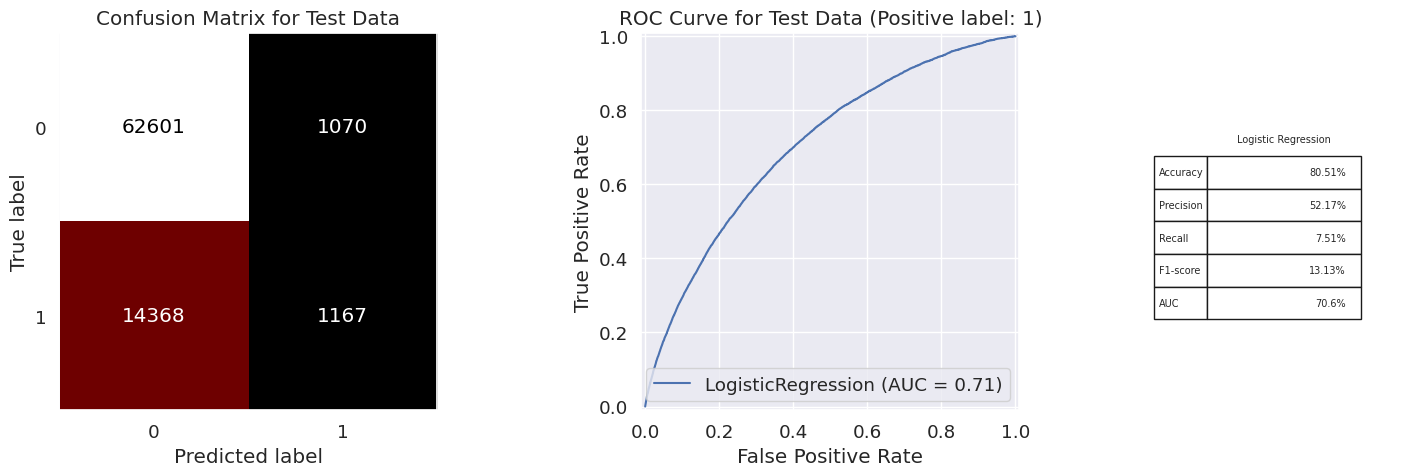

In [ ]:
model_evaluation(logreg_opt, X_train, X_test, y_train, y_test, 'Logistic Regression')

**Ранжирование по значимости признаков**

Вызываем функцию drop_column_importance и строим график значимости признаков на основе ярко выраженной разницы метрики

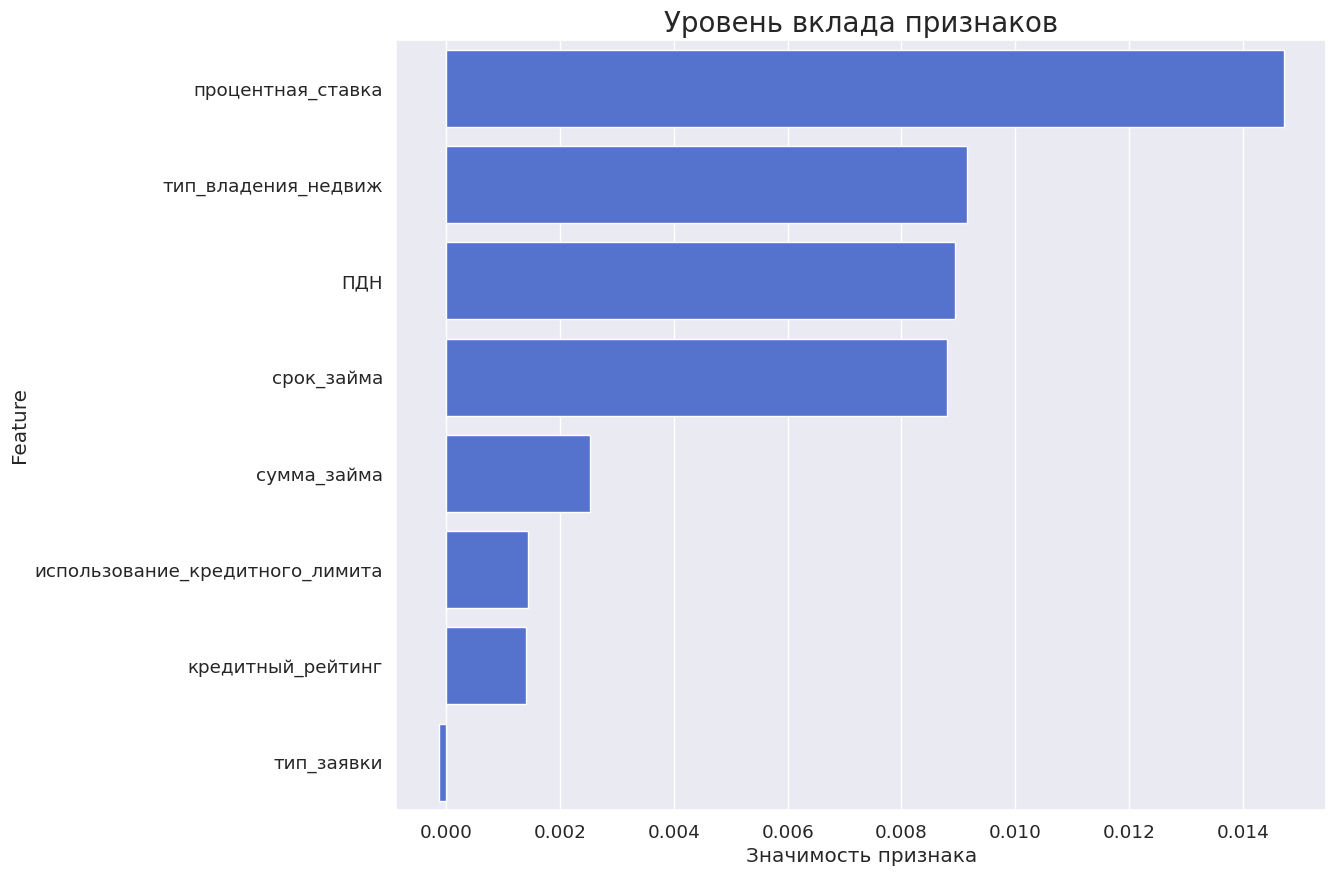

In [ ]:
drop_column_importance_plot(logreg_opt, X_train, y_train)

**Сокращение набора данных**

Обучение заняло 6 часов, поэтому мы решили сократить набор данных

In [ ]:
x_encoded_without_nonimp = X_encoded.drop('тип_заявки', axis=1)

In [ ]:
X_encoded = pd.concat([x_encoded_without_nonimp, y_encoded], axis=1)

In [ ]:
# Случайная выборка 10 000 экземпляров
reduced_data = X_encoded.sample(n=10000, random_state=42)
y = reduced_data["статус_займа"]
reduced_data = reduced_data.drop("статус_займа",  axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reduced_data, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print()
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 7)
y_train shape: (8000,)

X_test shape: (2000, 7)
y_test shape: (2000,)


In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg_opt_final = tune_clf_hyperparameters(logreg, param_grid, X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best hyperparameters:
 {'C': 100000.0, 'class_weight': {0: 0.4474736842105263, 1: 0.5525263157894738}, 'penalty': 'l2', 'solver': 'lbfgs'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan ... -0.57828856 -0.57829018
 -0.5781412 ]
  warnings.warn(



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      6432
           1       0.47      0.12      0.19      1568

    accuracy                           0.80      8000
   macro avg       0.64      0.54      0.54      8000
weighted avg       0.75      0.80      0.75      8000


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1608
           1       0.53      0.17      0.25       392

    accuracy                           0.81      2000
   macro avg       0.68      0.57      0.57      2000
weighted avg       0.77      0.81      0.77      2000



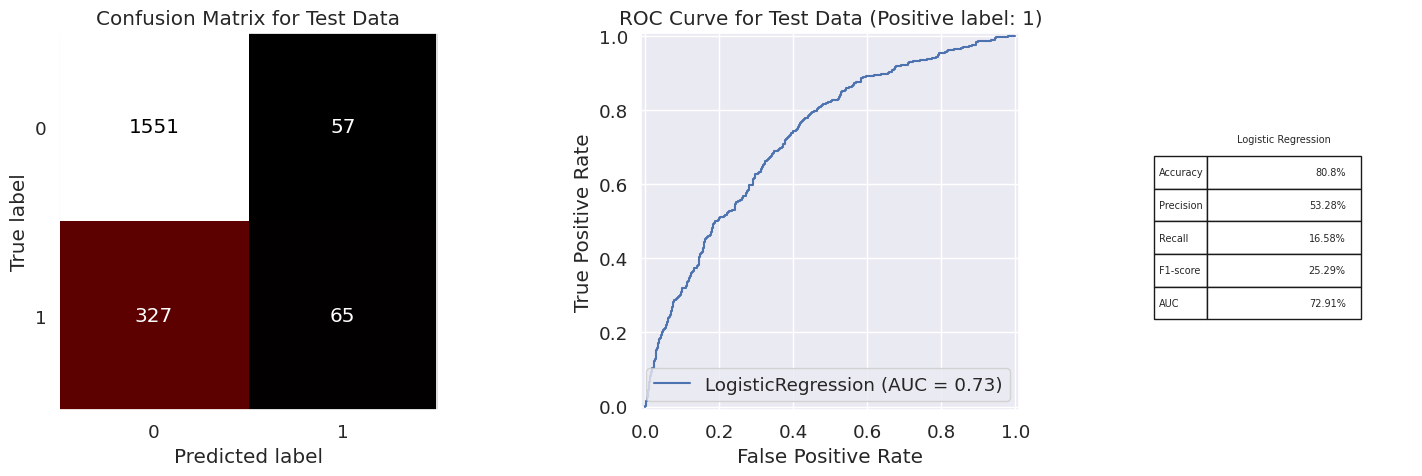

In [ ]:
model_evaluation(logreg_opt_final, X_train, X_test, y_train, y_test, 'Logistic Regression')

Записывается итоговая производительность классификатора логистической регрессии, рассчитывается с использованием функции metrics_calculator, которая выводит метрики производительности модели

In [ ]:
logreg_result = metrics_calculator(logreg_opt_final, X_test, y_test, 'Logistic Regression')

## **Gradient Boosting**

метод машинного обучения, использующий ансамбль слабых моделей, обычно деревьев решений, для задач классификации и регрессии. Он последовательно создает модели, каждая из которых исправляет ошибки предыдущей. Алгоритм обучает деревья, чтобы они соответствовали отрицательному градиенту функции потерь, а окончательный прогноз получается путем объединения результатов всех деревьев.

### Настройка гиперпараметров и обучение

Неправильная настройка гиперпараметров может привести к недообучению или переобучению и повлиять на способность модели обобщать невидимые данные.



*   **n_estimators**: количество деревьев в ансамбле.
*   **learning_rate**: скорость обучения уменьшает вклад каждого дерева на коэффициент learning_rate. Это параметр для управления величиной обновления, и значение должно быть установлено ниже для большого количества деревьев.
*   **max_depth**: максимальная глубина отдельных деревьев решений. Чем глубже дерево, тем больше у него разделений и тем сложнее становится модель.
*   **min_samples_split**: минимальное количество образцов, необходимое для разделения внутреннего узла.
*   **min_samples_leaf**: минимальное количество образцов, необходимое для листового узла.
*   **max_features**: количество признаков, которые следует учитывать при поиске наилучшего разделения.
*   **subsample**: доля образцов, которая будет использоваться для подгонки отдельных базовых учеников.
*   **loss**: функция потерь, которая должна быть оптимизирована. Функция потерь по умолчанию — «отклонение», которая относится к логистической регрессии для бинарной классификации и полиномиальному отклонению для задач многоклассовой классификации.
*   **критерий**: Функция для измерения качества разделения. Поддерживаемые критерии — «friedman_mse» для среднеквадратической ошибки, которая используется для задач регрессии, и «энтропия».

In [ ]:
gbc_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 5, 6],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'subsample': [0.9, 1.0],
    'learning_rate': [0.3, 0.4, 0.5]
}

In [ ]:
gbc = GradientBoostingClassifier(max_features=None, loss='log_loss', criterion='friedman_mse',
                                 learning_rate=0.4, max_depth=5, n_estimators=100, subsample=1.0,
                                 min_samples_leaf=4, min_samples_split=2, random_state=0)

gbc_opt = tune_clf_hyperparameters(gbc, gbc_param_grid, X_train, y_train)

Best hyperparameters:
 {'learning_rate': 0.3, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 1.0}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      6432
           1       0.91      0.19      0.32      1568

    accuracy                           0.84      8000
   macro avg       0.87      0.59      0.61      8000
weighted avg       0.85      0.84      0.79      8000


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1608
           1       0.45      0.09      0.15       392

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.52      2000
weighted avg       0.74      0.80      0.74      2000



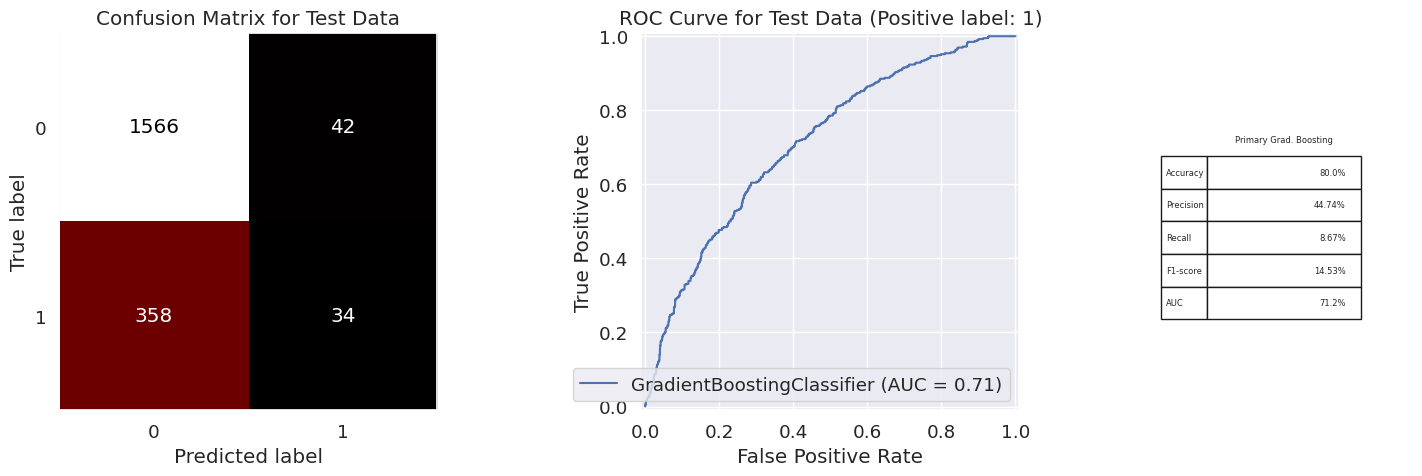

In [ ]:
model_evaluation(gbc_opt, X_train, X_test, y_train, y_test, 'Primary Grad. Boosting')

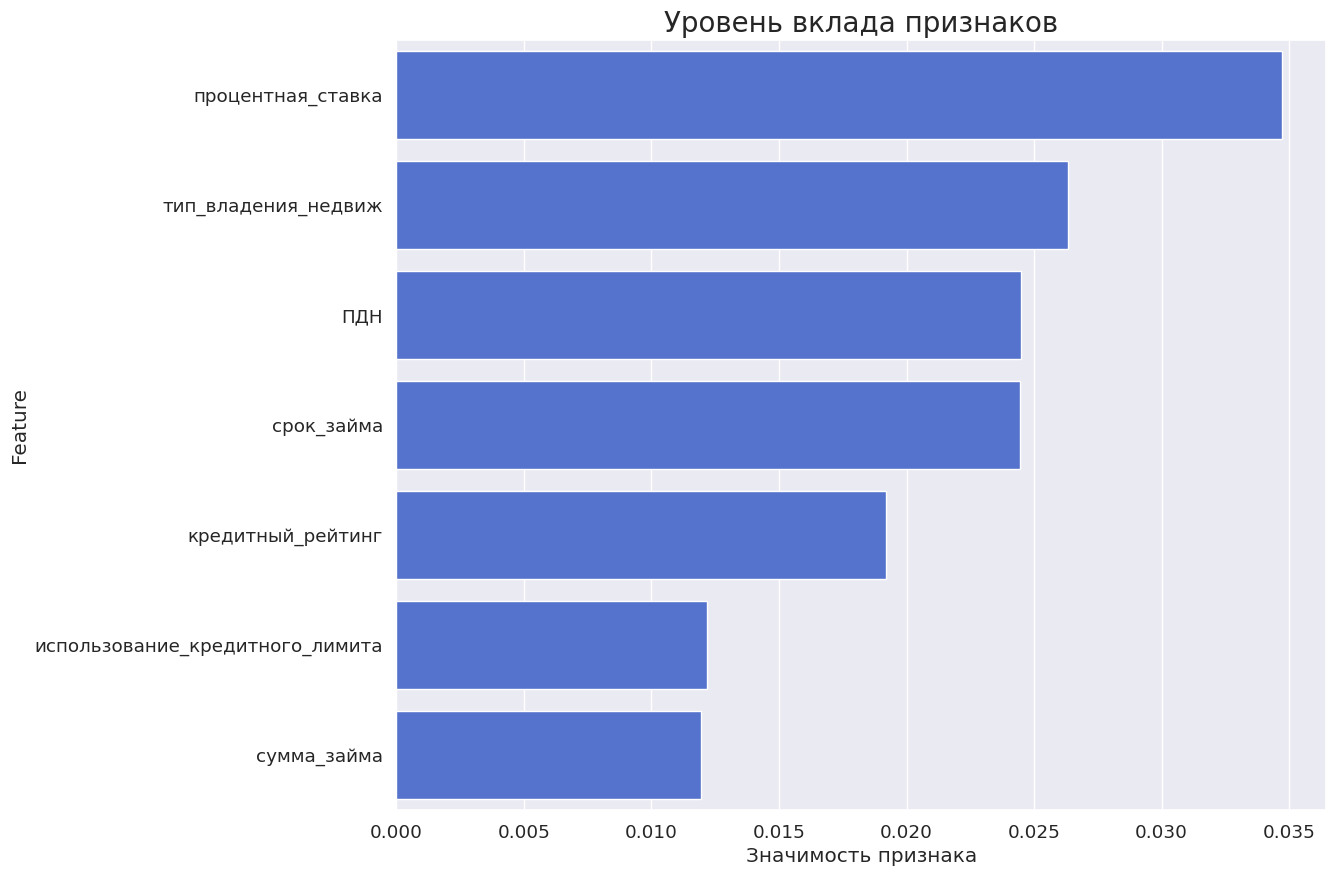

In [ ]:
drop_column_importance_plot(gbc_opt, X_train, y_train)

Каждый признак оказывает положительное влияние на прогнозирование цели, поэтому нет необходимости убирать какой-то из них

Однако изменим параметры на значения, подобранные функцией оптимизации

In [ ]:
gbc = GradientBoostingClassifier(max_features=None, loss='log_loss', criterion='friedman_mse',
                                 learning_rate=0.3, max_depth=4, n_estimators=50, subsample=1.0,
                                 min_samples_leaf=4, min_samples_split=2, random_state=0)

gbc_final = tune_clf_hyperparameters(gbc, gbc_param_grid, X_train, y_train)

### Оценка производительности модели градиентного спуска


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      6432
           1       0.91      0.19      0.32      1568

    accuracy                           0.84      8000
   macro avg       0.87      0.59      0.61      8000
weighted avg       0.85      0.84      0.79      8000


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1608
           1       0.45      0.09      0.15       392

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.52      2000
weighted avg       0.74      0.80      0.74      2000



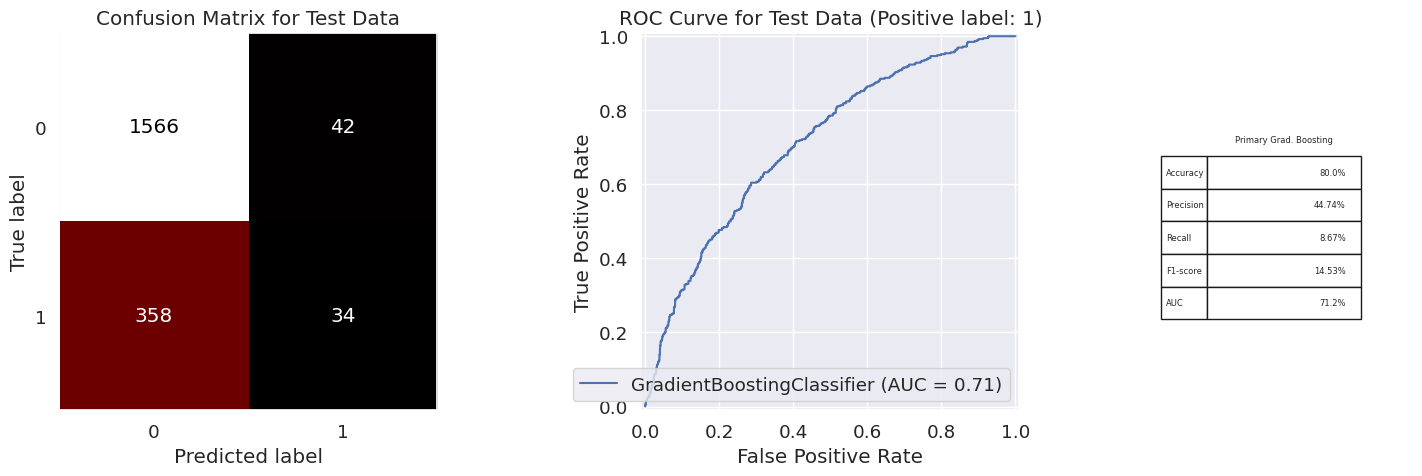

In [ ]:
model_evaluation(gbc_final, X_train, X_test, y_train, y_test, 'Primary Grad. Boosting')

In [ ]:
gbc_result = metrics_calculator(gbc_final, X_test, y_test, 'Gradient Boosting')

## **XGBoost**

XGBoost — это тип алгоритма градиентного бустинга для моделей машинного обучения на основе дерева. Он расшифровывается как eXtreme Gradient Boosting. XGBoost — это высокооптимизированная реализация градиентного бустинга, разработанная для быстрой работы и эффективного использования памяти.

XGBoost имеет несколько уникальных функций по сравнению с другими реализациями градиентного бустинга, такими как:

*   Обработка пропущенных значений
*   Параллельная обработка для обучения и прогнозирования
*   Обрезка деревьев для снижения переобучения
*   Регуляризация для предотвращения переобучения

Эти функции делают XGBoost популярным и мощным инструментом для решения многих задач машинного обучения.

### Настройка гиперпараметров и обучение



*   **eta** (скорость обучения): уменьшение размера шага, используемое в обновлениях для предотвращения переобучения.
*   **max_depth**: Максимальная глубина дерева. Увеличение этого значения сделает модель более сложной и повысит вероятность переобучения.
*   **гамма**: Минимальное уменьшение потерь, необходимое для выполнения дальнейшего разбиения на конечные узлы дерева.
*   **лямбда** (reg_lambda): L2-элемент регуляризации весов. Увеличение этого значения сделает модель более консервативной.
*   **альфа** (reg_alpha): элемент регуляризации L1 для весов. Увеличение этого значения приведет к увеличению выбора признаков.
*   **subsample**: соотношение подвыборок для обучающих экземпляров. Установка значения меньше 1 сделает модель более случайной.
*   **colsample_bytree**: соотношение столбцов подвыборки при построении каждого дерева.
*   **colsample_bylevel**: соотношение столбцов подвыборки для каждого уровня.
*   **n_estimators**: Количество деревьев в лесу.
*   **max_leaf_nodes**: Максимальное количество конечных узлов или листьев в дереве.
*   **max_delta_step**: Максимальный дельта-шаг для каждого листа. Он используется для дальнейшего контроля диапазона значений веса для каждого экземпляра.
*   **scale_pos_weight**: Это отношение количества отрицательных классов к положительному классу и управляет балансом положительных и отрицательных весов, что полезно для несбалансированных классов.
*   **min_child_weight**: Минимальная сумма значений веса экземпляра (hessian), необходимая для дочернего элемента. Если в результате выполнения шага разбиения дерева будет получен конечный узел с суммой значений веса экземпляра, меньшей, чем min_child_weight, процесс построения откажется от дальнейшего разбиения.
*   **booster**: Базовая модель, используемая XGBoost, либо древовидная (gbtree), либо линейная (gblinear). Древовидный booster всегда превосходит линейный booster, и поэтому последний используется редко.
*   **Цель**: Определяет функцию потерь, используемую для оценки производительности модели.
*   **eval_metric**: определяет показатель, используемый для оценки производительности модели во время обучения и тестирования.

In [ ]:
# Выбираем равномерную случайную выборку из 8000 экземпляров
data = pd.concat([X_encoded, y_encoded], axis=1)
data_sampled = data.sample(n=8000, random_state=0)

# Отделяем X и y снова
X_sampled = data_sampled.drop(columns=['статус_займа'])
y_sampled = data_sampled['статус_займа']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=0, stratify=y_sampled)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print()
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6400, 8)
y_train shape: (6400,)

X_test shape: (1600, 8)
y_test shape: (1600,)


In [ ]:
ratio = sum(y_train==0)/sum(y_train==1)
xgb_param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 5, 10],
    'scale_pos_weight': [ratio, ratio*1.3, ratio*1.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'colsample_bylevel': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1],
    'max_delta_step': [0, 1, 2],
    'gamma': [0, 0.1, 1],
    'max_leaf_nodes': [2, 4, 6]
}

In [ ]:
xgb_opt = XGBClassifier(max_depth=4,
                        learning_rate=0.3,
                        n_estimators=200,
                        min_child_weight=1,
                        scale_pos_weight=1.5,
                        colsample_bytree=0.8,
                        gamma=0.1,
                        booster='gbtree',
                        objective='binary:logistic',
                        eval_metric='auc',
                        random_state=0)

xgb_opt = tune_clf_hyperparameters(xgb_opt, xgb_param_grid, X_train, y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:55:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_leaf_nodes" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:55:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_leaf_nodes" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:55:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_leaf_nodes" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:55:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_leaf_nodes" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:55:43] WARNING: /workspace/src/lear

# Оценка производительности


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6432
           1       0.90      0.59      0.71      1568

    accuracy                           0.91      8000
   macro avg       0.90      0.79      0.83      8000
weighted avg       0.91      0.91      0.90      8000


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1608
           1       0.44      0.24      0.31       392

    accuracy                           0.79      2000
   macro avg       0.64      0.58      0.59      2000
weighted avg       0.76      0.79      0.77      2000



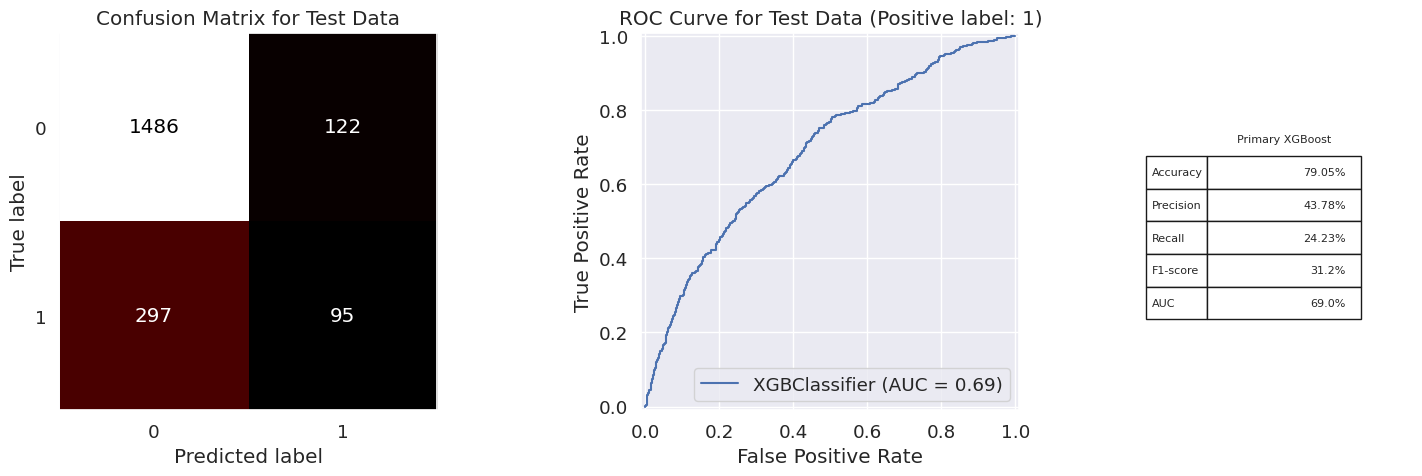

In [ ]:
model_evaluation(xgb_opt, X_train, X_test, y_train, y_test, 'Primary XGBoost')

In [ ]:
xgb_result = metrics_calculator(xgb_opt, X_test, y_test_encoded, 'XGBoost')

## **SVM**

Метод опорных векторов (SVM) — это алгоритм контролируемого обучения, применяемый для задач классификации и регрессии. Он находит оптимальную границу (границу принятия решения), разделяющую данные на классы, и стремится максимизировать расстояние между границей и ближайшими точками данных, известными как опорные векторы. SVM может обрабатывать нелинейные данные, преобразуя их в многомерное пространство, где они становятся линейно разделяемыми.

**Преимущества**:


*   Устойчивость к выбросам: SVM менее чувствителен к выбросам, что делает его подходящим для данных с возможными аномалиями.

*  Универсальность: Алгоритм применим как для классификации, так и для регрессии и способен обрабатывать нелинейные данные с помощью функций ядра.

*  Эффективность в многомерном пространстве: SVM хорошо работает в ситуациях, когда количество признаков значительно превышает количество обучающих экземпляров.

*  Высокая производительность на малых выборках: SVM показывает отличные результаты даже на небольших наборах данных и требует меньше обучающих примеров для получения точных предсказаний.

**Недостатки:**

*  Низкая производительность при работе с большими наборами данных: SVM может требовать больших вычислительных затрат и может работать медленно, когда набор данных большой.

*  Переобучение: SVM может переобучать данные, особенно когда количество объектов намного превышает количество выборок.

*  Ограниченная интерпретируемость: SVM - это модель "черного ящика", и может быть трудно интерпретировать результаты и понять, как алгоритм делает прогнозы.

*  Сложность выбора правильной функции ядра: Выбор функции ядра имеет решающее значение для производительности SVM, и может быть трудно определить наилучшую для конкретной задачи.

### Настройка гиперпараметров и обучение


*   ***C***: Этот гиперпараметр определяет компромисс между достижением низкой ошибки обучения и низкой ошибки тестирования. Меньшее значение C приводит к большему запасу и большему количеству неправильно классифицированных обучающих примеров, в то время как большее значение C приводит к меньшему запасу и меньшему количеству неправильно классифицированных обучающих примеров.

*  **ядро**: Этот гиперпараметр определяет тип функции ядра, используемой для преобразования входных данных в пространство более высокой размерности, где можно найти линейную границу. Общие функции ядра включают линейные, полиномиальные, rbf (радиальная базисная функция), сигмовидные и предварительно вычисленные ядра.

*  **гамма**: коэффициент ядра для rbf, поли- и сигмовидных ядер.

*  **степень**: Этот гиперпараметр применим только при использовании полиномиального ядра. Он определяет степень полиномиальной функции, используемой для преобразования входных данных.

In [ ]:
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,0.5,12)]

param_grid = [{'kernel': ['rbf'],
               'gamma': [0.1, 0.01, 0.001, 0.0001],
               'C': [0.1, 1, 10, 100, 1000],
               'class_weight': class_weights}]

In [ ]:
X_encoded_2 = pd.concat([X_encoded, y_encoded], axis=1)

In [ ]:
X_encoded_3 = X_encoded_2.drop("статус_займа",  axis=1)

In [ ]:
X_encoded_4 = pd.concat([X_encoded_3, y_encoded], axis=1)
X_encoded_4

,сумма_займа,процентная_ставка,ПДН,использование_кредитного_лимита,тип_заявки,тип_владения_недвиж,кредитный_рейтинг,срок_займа,статус_займа
0,0.174485,0.167245,0.184358,0.216158,0.196115,0.226879,0.125532,0.157708,0
1,0.158859,0.134773,0.229754,0.164142,0.196077,0.169301,0.125849,0.157997,0
2,0.189704,0.125539,0.123460,0.239022,0.196096,0.226078,0.125966,0.157798,0
3,0.173331,0.061709,0.140070,0.198229,0.196096,0.226078,0.061952,0.157798,0
4,0.224161,0.226322,0.279312,0.189410,0.196070,0.168845,0.211412,0.319811,1
...,...,...,...,...,...,...,...,...,...
396025,0.196412,0.132989,0.173276,0.148159,0.196096,0.226078,0.211583,0.157798,0
396026,0.174391,0.279975,0.208647,0.234219,0.196078,0.169947,0.288126,0.320187,0
396027,0.169698,0.261917,0.238089,0.149336,0.196070,0.207481,0.211412,0.157652,0
396028,0.202645,0.122983,0.229942,0.165614,0.196070,0.227254,0.125217,0.157652,0


In [ ]:
# Случайная выборка 5 000 экземпляров
reduced_data = X_encoded_4.sample(n=5000, random_state=42)
y = reduced_data["статус_займа"]
reduced_data = reduced_data.drop("статус_займа",  axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reduced_data, y, test_size=0.2, random_state=0)

In [ ]:
svm = SVC(probability=True, random_state=0)

svm_opt = tune_clf_hyperparameters(svm, param_grid, X_train, y_train)

Best hyperparameters:
 {'C': 100, 'class_weight': {0: 0.18245454545454545, 1: 0.8175454545454546}, 'gamma': 0.1, 'kernel': 'rbf'}


**Ранжирование значимости признаков**

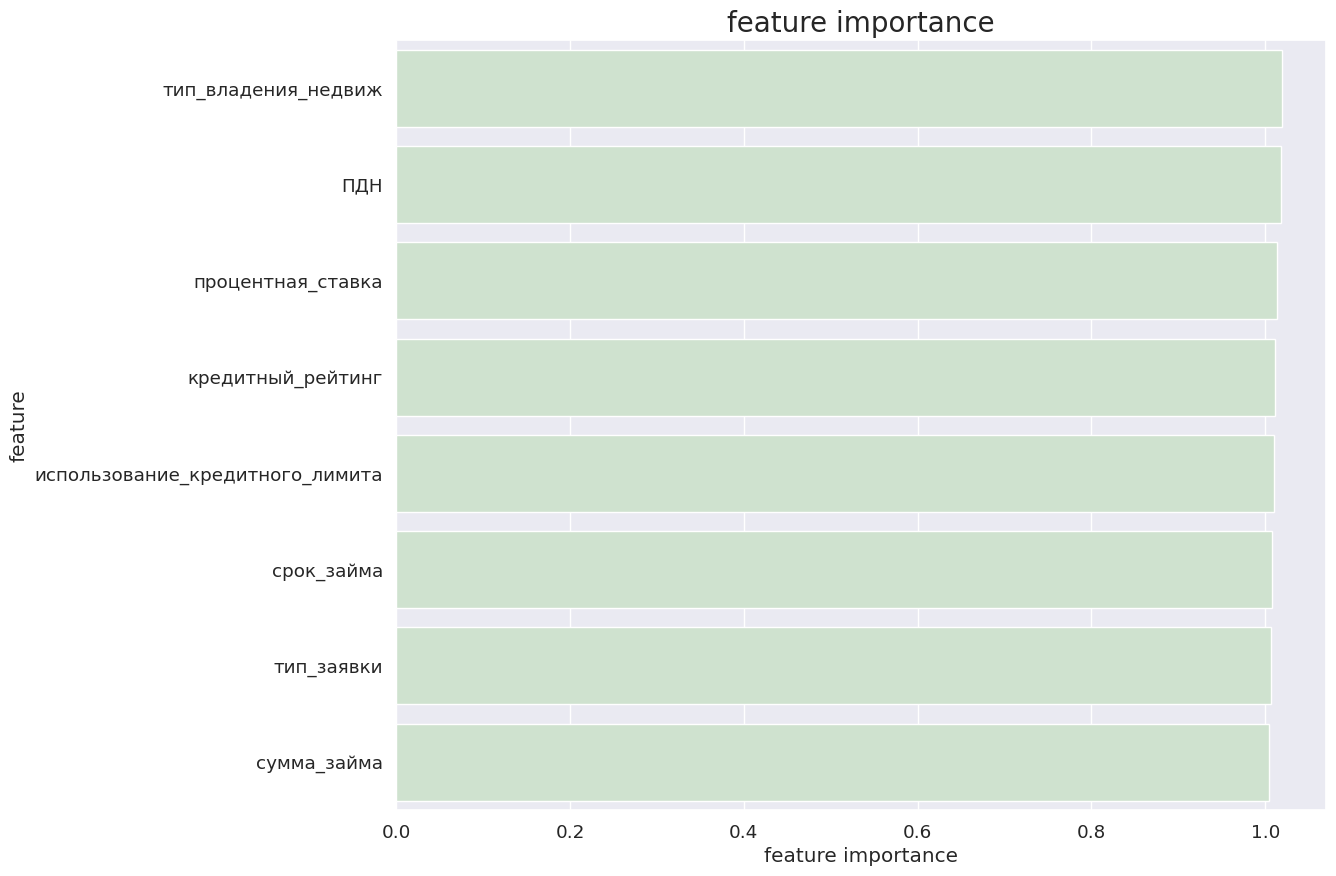

In [ ]:
drop_column_importance_plot(svm_opt, X_train, y_train)

### Оценка производительности модели SVM


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.59      0.71      3220
           1       0.30      0.72      0.42       780

    accuracy                           0.61      4000
   macro avg       0.60      0.65      0.57      4000
weighted avg       0.78      0.61      0.65      4000


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.58      0.70       796
           1       0.31      0.73      0.43       204

    accuracy                           0.61      1000
   macro avg       0.60      0.65      0.57      1000
weighted avg       0.77      0.61      0.65      1000



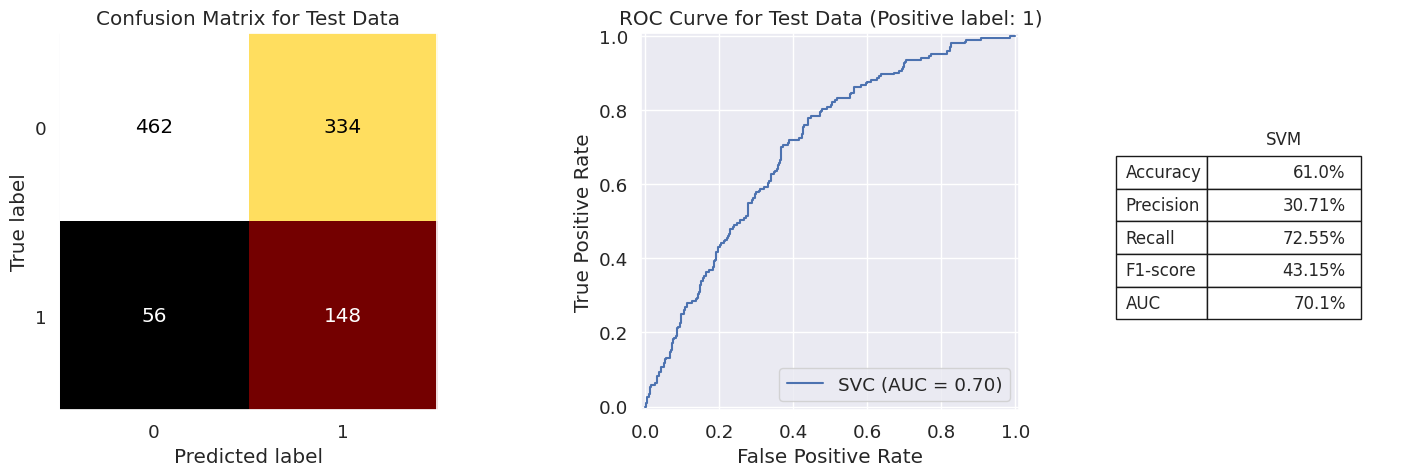

In [ ]:
model_evaluation(svm_opt, X_train, X_test, y_train, y_test, 'SVM')

In [ ]:
svm_result = metrics_calculator(svm_opt, X_test, y_test, 'SVM')

## **Decision Tree**

Дерево решений — это алгоритм контролируемого обучения, основанный на деревьях, который может использоваться для задач классификации или регрессии. Он работает путем рекурсивного разделения данных на подмножества в зависимости от значений признаков, стремясь минимизировать функцию потерь, такую ​​как неопределенность Джини или энтропия.

**Преимущества:**

- **Простота понимания и визуализации:** Деревья решений легки в понимании и наглядны.

- **Работа с числовыми и категориальными данными:** Деревья решений могут обрабатывать как числовые, так и категориальные данные.

- **Выбор признаков:** Деревья решений могут использоваться для выбора признаков, так как важные признаки будут находиться ближе к корню дерева.

- **Непараметрические:** Деревья решений являются непараметрическими, что означает отсутствие предположений о распределении данных.

**Недостатки:**

- **Переобучение:** Деревья решений могут страдать от переобучения, особенно при глубоком обучении или небольших тренировочных выборках, что приводит к плохой обобщаемости на новых данных.

- **Нестабильность:** Небольшие изменения в данных могут вызывать значительные изменения в дереве, что делает его нестабильным.

- **Склонность к признакам с множеством категорий:** Деревья решений могут быть предвзяты к признакам с большим количеством категорий, что может доминировать в процессе построения дерева.

- **Плохая апроксимация сложных функций:** Деревья решений могут быть неэффективны для апроксимации сложных функций, так как они ограничены делениями вдоль осей на каждом узле.

Классификаторы на основе решающих деревьев склонны к переобучению, что происходит, когда дерево становится слишком сложным и подгоняет данные обучения, захватывая даже шум в них.

**Способы предотвращения переобучения:**

   - **Обрезка:** Удаление ветвей дерева, которые не вносят значительного вклада в классификацию.

   - **Использование ансамблевых методов:** Объединение нескольких деревьев решений для создания более устойчивой модели.

   - **Ограничение размера дерева:** Установка минимального числа образцов, необходимых для разделения узла, или максимальной глубины дерева.

**Наиболее распространенные гиперпараметры для классификаторов деревьев решений:**

-   **Критерий:** Этот гиперпараметр определяет критерий, используемый для оценки качества разделения, например, "Дискриминация Джини" или "Информационный прирост".

- **Максимальная глубина:** Контролирует максимальную глубину дерева, что может помочь предотвратить переобучение, так как более глубокие деревья становятся сложнее.

- **Минимальное количество образцов для разделения:** Устанавливает минимальное количество образцов, необходимых для дальнейшего разделения узла, что также может снизить переобучение.

- **Минимальное количество образцов для листа:** Устанавливает минимальное количество образцов для листового узла, недостаточное количество которых может привести к удалению узла.

- **Максимальное число признаков:** Определяет максимальное количество признаков, которые следует учитывать при разделении узла, что помогает сократить сложность модели.

- **Веса классов:** Веса, связанные с классами.

Мы снова определяем сетку гиперпараметров с использованием вышеуказанных значений, а затем вызываем функцию tune_clf_hyperparameters для нахождения наилучшей комбинации.

### Настройка гиперпараметров и обучение

In [ ]:
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]

param_grid = {'criterion': ['gini'],
              'max_depth': np.arange(1, 10),
              'min_samples_split': np.arange(1, 10),
              'min_samples_leaf': np.arange(1, 10),
              'max_features': [None, 'sqrt', 'log2'],
              'class_weight': class_weights}

In [ ]:
reduced_data = X_encoded.sample(n=10000, random_state=42)
y = reduced_data["статус_займа"]
reduced_data = reduced_data.drop("статус_займа",  axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reduced_data, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
dt = DecisionTreeClassifier(random_state=0)

# Find the best classifier with the optimal hyperparameters
dt_opt = tune_clf_hyperparameters(dt, param_grid, X_train, y_train)

Best hyperparameters:
 {'class_weight': {0: 0.26389473684210524, 1: 0.7361052631578948}, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 2}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.73      0.80      3220
           1       0.33      0.53      0.40       780

    accuracy                           0.69      4000
   macro avg       0.60      0.63      0.60      4000
weighted avg       0.76      0.69      0.72      4000


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       796
           1       0.32      0.51      0.39       204

    accuracy                           0.68      1000
   macro avg       0.58      0.61      0.59      1000
weighted avg       0.74      0.68      0.70      1000



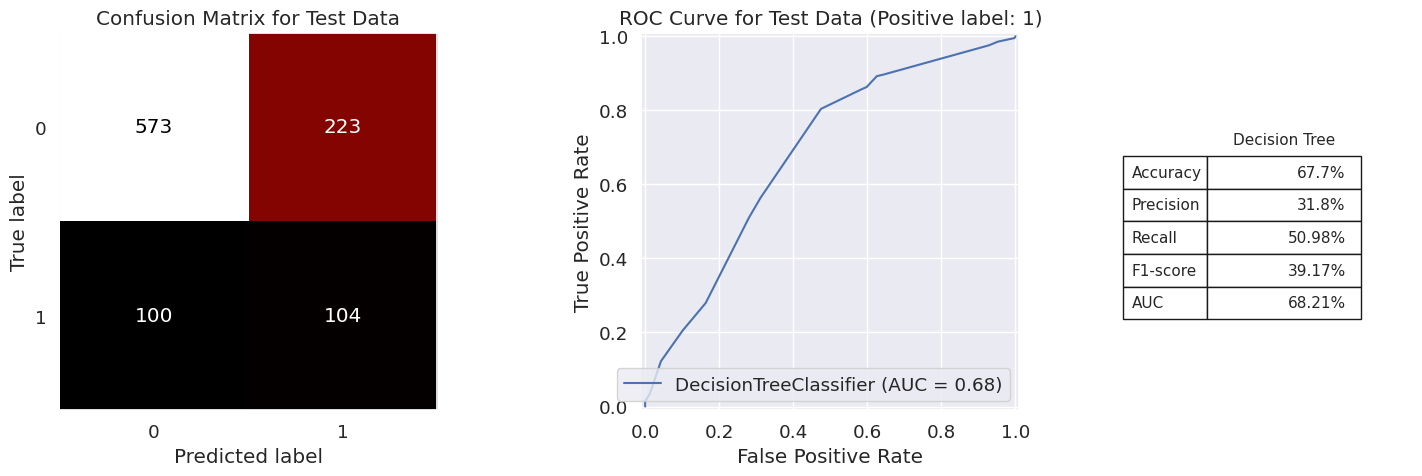

In [ ]:
model_evaluation(dt_opt, X_train, X_test, y_train, y_test, 'Decision Tree')

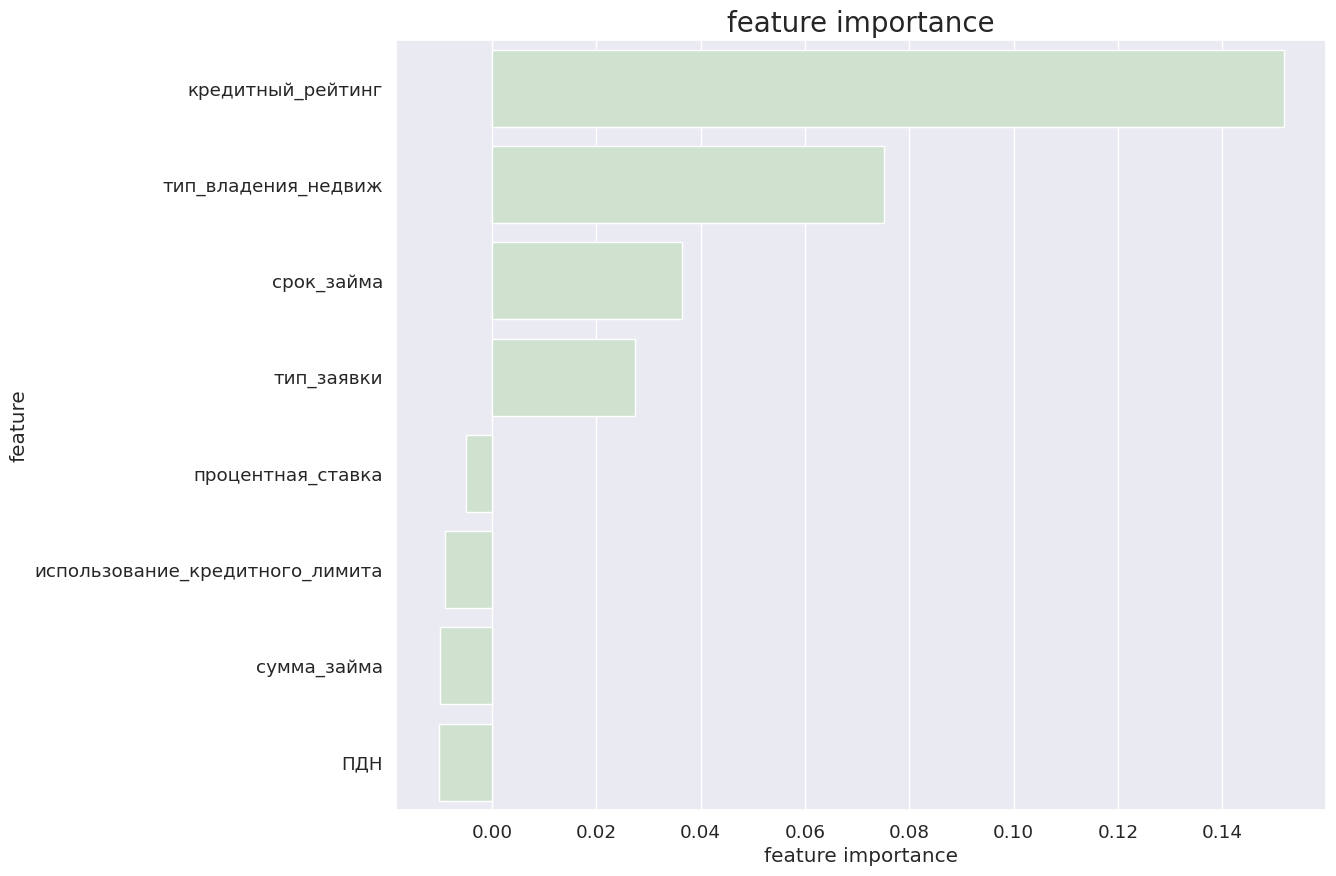

In [ ]:
drop_column_importance_plot(dt_opt, X_train, y_train)

In [ ]:
feature_importances = drop_column_importance(dt_opt, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.01]['feature']

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

NameError: name 'dt_opt' is not defined

In [ ]:
# Определение весов классов
class_weights = {0: 0.26389473684210524, 1: 0.7361052631578948}

# Параметры для настройки
param_grid = {
    'criterion': ['gini'],
    'max_depth': [4],
    'min_samples_split': [2],
    'min_samples_leaf': [7],
    'max_features': ['log2'],
    'class_weight': [class_weights]
}

In [ ]:
dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)  # cv - количество фолд для кросс-валидации

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

Лучшие параметры: {'class_weight': {0: 0.26389473684210524, 1: 0.7361052631578948}, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 2}


### Оценка производительности модели Decision Tree


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      3220
           1       0.33      0.45      0.38       780

    accuracy                           0.71      4000
   macro avg       0.59      0.61      0.59      4000
weighted avg       0.75      0.71      0.73      4000


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.76      0.80       796
           1       0.30      0.40      0.35       204

    accuracy                           0.69      1000
   macro avg       0.57      0.58      0.57      1000
weighted avg       0.72      0.69      0.70      1000



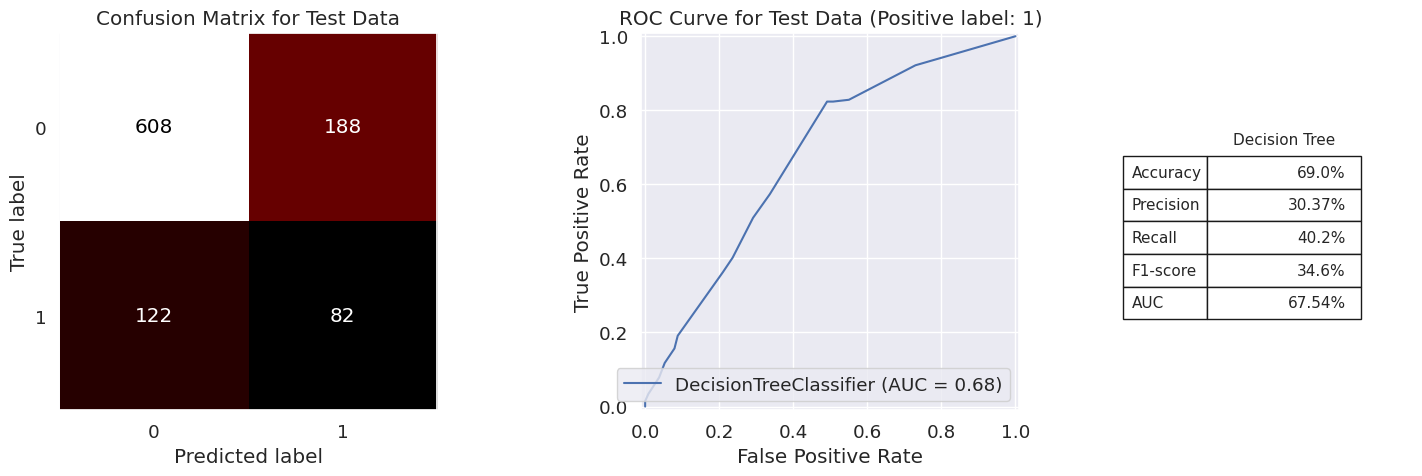

In [ ]:
model_evaluation(best_model, X_train, X_test, y_train, y_test, 'Decision Tree')

In [ ]:
dt_result = metrics_calculator(best_model, X_test, y_test, 'Decision Tree')

## **Random Forest**

Случайный лес — это метод ансамблевого обучения, используемый для классификации, регрессии и других задач, который строит множество деревьев решений в процессе обучения. Он определяет класс на основе наиболее частого значения (в случае классификации) или усредненного значения (в случае регрессии) отдельных деревьев. Деревья в случайном лесу создаются из случайных выборок обучающих данных и подмножеств признаков, что снижает вероятность переобучения и повышает стабильность модели благодаря объединению нескольких деревьев, что и объясняет название "Случайный лес".

### Настройка гиперпараметров и обучение

слишком высокая установка максимальной глубины посадки деревьев может привести к переобучению, в то время как слишком низкая - к недоразвитию. То же самое относится и к другим гиперпараметрам, таким как минимальное количество выборок, необходимых для разделения узла, или количество признаков, учитываемых при разделении узла. Настройка гиперпараметров помогает найти наилучшую комбинацию значений, которая обеспечивает наилучшую производительность при решении конкретной задачи.

* **n_estimators**: Количество деревьев в лесу.

* **критерий**: функция для измерения качества деления. Общие критерии включают примесь Gini и получение информации.

* **max_depth**: Максимальная глубина дерева. Это можно использовать для управления сложностью модели и предотвращения переобучения.

* **min_samples_split**: Минимальное количество выборок, необходимое для разделения внутреннего узла.

* **min_samples_leaf**: Минимальное количество выборок, необходимое для разделения конечного узла.

* **bootstrap**: Использовать ли выборку с заменой при строительстве деревьев в лесу.

* **oob_score**: Следует ли использовать готовые выборки для оценки точности обобщения.

* **class_weight**: Веса, связанные с классами.

* **max_features**: Максимальное количество объектов, которые следует учитывать при разделении узла. Это может быть число или значение с плавающей точкой (в процентах), или 'sqrt', или 'log2'.

Мы устанавливаем диапазон значений для каждого гиперпараметра, который мы хотим использовать для нашего классификатора случайных лесов, а затем используем функцию tune_clf_hyperparameters, чтобы найти наилучшую комбинацию гиперпараметров, которая обеспечивает наилучшие результаты:

Примечание: Деревья, составляющие лес, могут быть либо низкорослыми, что означает, что у них ограниченное количество ветвей или уровней, либо глубокими, что означает, что у них много ветвей или уровней и они не полностью выросли. Глубокие деревья имеют низкую погрешность, но высокую дисперсию и, следовательно, являются подходящим выбором для методов группирования, которые в основном направлены на уменьшение дисперсии. Мы учитываем наличие глубоких деревьев при выборе диапазона значений для гиперпараметров случайного леса.

In [ ]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': np.arange(5, 12),
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': class_weights
}

In [ ]:
X_encoded = pd.concat([X_encoded, y_encoded], axis=1)

In [ ]:
# Случайная выборка 10 000 экземпляров
reduced_data = X_encoded.sample(n=3000, random_state=42)
y = reduced_data["статус_займа"]
reduced_data = reduced_data.drop("статус_займа",  axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reduced_data, y, test_size=0.2, random_state=0)

In [ ]:
rf = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True,  n_estimators=100,
                            max_depth = 9,  min_samples_leaf=6, min_samples_split=2,
                            class_weight={0: 0.58, 1: 0.42}, random_state=0)

rf_opt = tune_clf_hyperparameters(rf, param_grid, X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
6300 fits failed out of a total of 18900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

Best hyperparameters:
 {'class_weight': {0: 0.1061578947368421, 1: 0.8938421052631579}, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


In [ ]:
Best hyperparameters:
 {'class_weight': {0: 0.1061578947368421, 1: 0.8938421052631579}, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}

**Ранжирование значимости признаков**

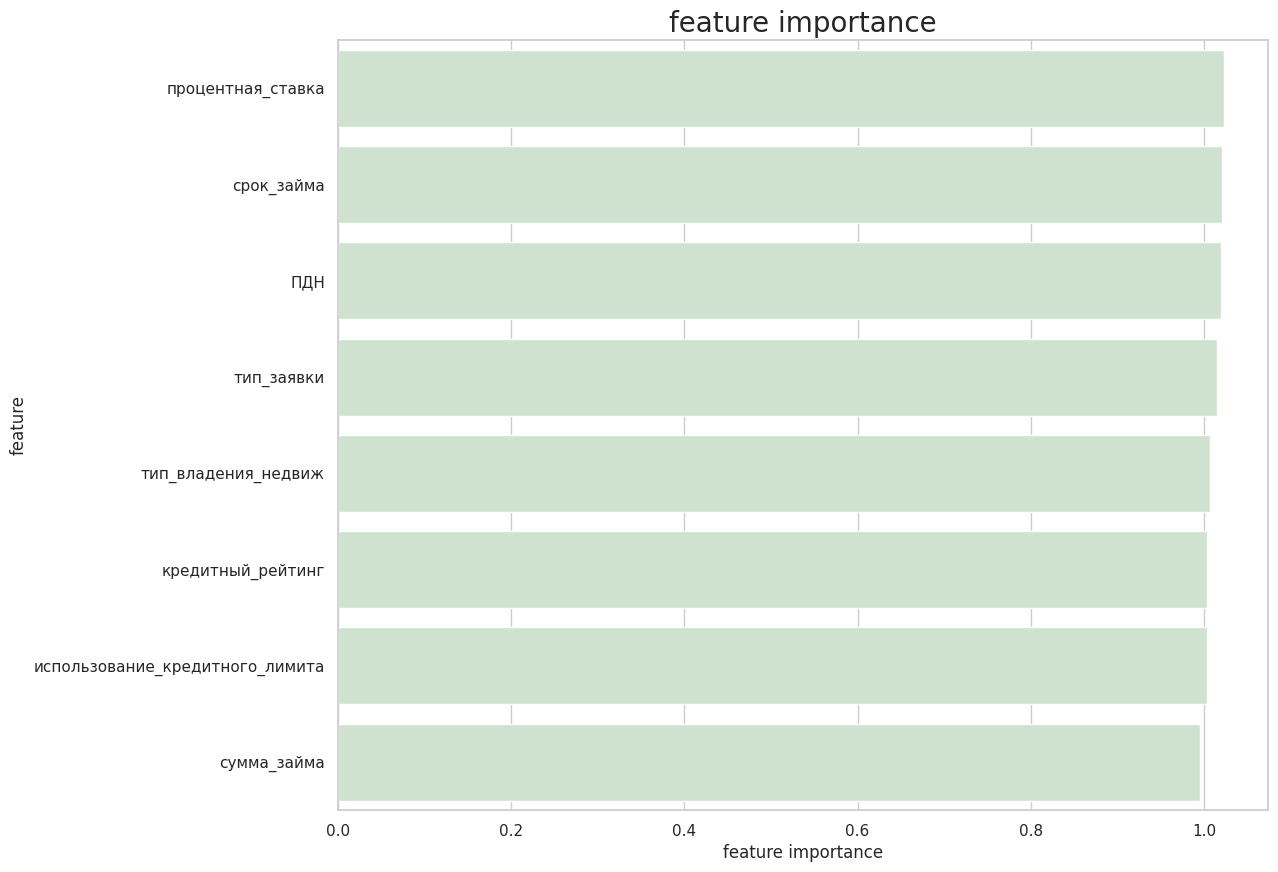

In [ ]:
drop_column_importance_plot(rf_opt, X_train, y_train)

### Оценка производительности модели Random Forest


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.55      0.70      1961
           1       0.31      0.91      0.47       439

    accuracy                           0.62      2400
   macro avg       0.64      0.73      0.59      2400
weighted avg       0.85      0.62      0.66      2400


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.52      0.66       477
           1       0.28      0.73      0.41       123

    accuracy                           0.56       600
   macro avg       0.58      0.63      0.53       600
weighted avg       0.76      0.56      0.61       600



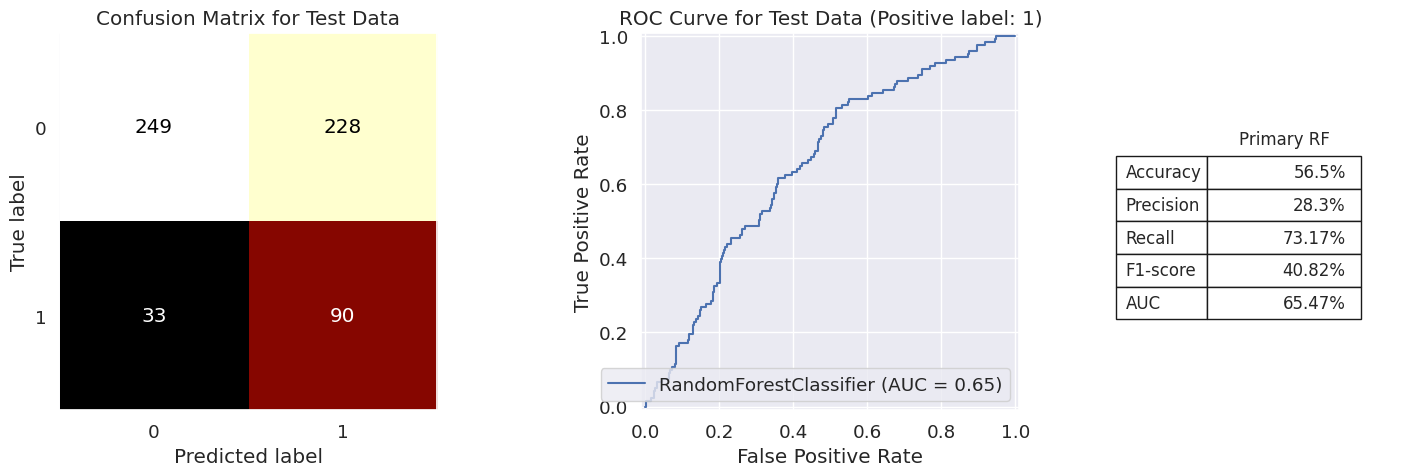

In [ ]:
model_evaluation(rf_opt, X_train, X_test, y_train, y_test, 'Primary RF')

In [ ]:
rf_result = metrics_calculator(rf_opt, X_test, y_test, 'Random Forest')

# **Общий вывод**

In [ ]:
from tabulate import tabulate

# Собираем результаты в список
results = [
    ["Logistic Regression"] + list(logreg_result.values()),
    ["SVM"] + list(svm_result.values()),
    ["Decision Tree"] + list(dt_result.values()),
    ["Random Forest"] + list(rf_result.values()),
    ["Gradient Boosting"] + list(gbc_result.values()),
    ["XGBoost"] + list(xgb_result.values())
]

headers = ["Model", "Accuracy", "Precision", "Recall", "F1-score", "AUC"]

# Сортируем результаты по AUC
results.sort(key=lambda x: float(x[5]), reverse=True)  # Индекс 5 соответствует AUC

print(tabulate(results, headers=headers, tablefmt="grid"))

+---------------------+------------+-------------+----------+------------+-------+
| Model               |   Accuracy |   Precision |   Recall |   F1-score |   AUC |
+=====================+============+=============+==========+============+=======+
| Logistic Regression |      80    |       53.28 |    16.58 |      25.29 | 73.91 |
+---------------------+------------+-------------+----------+------------+-------+
| Gradient Boosting   |      80    |       44.74 |     8.67 |      14.53 | 71.2  |
+---------------------+------------+-------------+----------+------------+-------+
| SVM                 |      61    |       30.71 |    72.55 |      43.15 | 70.1  |
+---------------------+------------+-------------+----------+------------+-------+
| XGBoost             |      79.05 |       43.78 |    24.23 |      31.2  | 69    |
+---------------------+------------+-------------+----------+------------+-------+
| Decision Tree       |      69    |       30.37 |    40.2  |      34.6  | 67.54 |
+---

Из приведенной выше таблицы должно быть ясно, что разработка модели кредитного скоринга — это больше, чем просто статистические методы.

Результаты нашего исследования показали, что **логистическая регрессия** продемонстрировала наилучший результат по метрике **AUC**, составивший 73%. Этот показатель считается важным, так как он отражает способность модели отличать положительные примеры от отрицательных. Высокий AUC указывает на надежность модели в предсказании **положительного класса** - в нашем случае означающем **вероятность дефолта**.  Хотя всегда есть место для улучшения, результат позволяет модели эффективно идентифицировать большинство заемщиков с высоким риском и правильно классифицировать их.

В заключение можно сказать, что хотя кредитный скоринг никогда не сможет с абсолютной уверенностью предсказать эффективность отдельного заемщика/кредита, его преимущества и полезность были доказаны снова и снова. Поэтому внедрение кредитного скоринга становится необходимым шагом для любого банка, стремящегося к эффективному управлению рисками и принятию обоснованных решений.